In [1]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def draw(model_list, nb_list):
    for model in model_list:
        for nb in nb_list:
            data_lamb, data_seed, data_infidelity, data_postsel_infidelity = [], [], [], []

            f = open(f"{model}_sweep_lamb_{nb}blocks_noise=0.1_t=1.txt")
            for line in f.readlines():
                line = line.strip().replace("#blocks =", "").replace("noise =", "").replace("lamb =", "").replace(
                    "t =", "").replace("seed =", "").replace("innerprod =", "").replace("leakage =", "").replace(
                    "postsel_", "").replace(",", "")
                _, _, lamb, _, seed, innerprod, _, postsel_innerprod = line.split()
                data_lamb.append(int(lamb))
                data_seed.append(int(seed))
                data_infidelity.append(1 - abs(complex(innerprod)) ** 2)
                data_postsel_infidelity.append(1 - abs(complex(postsel_innerprod)) ** 2)
            f.close()

            df = pd.DataFrame(data={
                "lamb": data_lamb,
                "seed": data_seed,
                "infidelity": data_infidelity,
                "postsel_infidelity": data_postsel_infidelity
            })

            assert np.all(df["lamb"].unique() == 2 ** np.arange(5, 15))

            newdf = df.groupby("lamb")["infidelity"].agg(['count', 'mean', 'std']).reset_index()
            print(f"{model}, {nb} blocks, postselected infidelity:")
            print(newdf)
            print("\n")
            lamb_arr = newdf["lamb"].to_numpy()
            mean_arr = newdf["mean"].to_numpy()
            std_arr = newdf["std"].to_numpy()

            plt.errorbar(lamb_arr, mean_arr, yerr=std_arr,
                        label=f'{nb} blocks',
                        fmt='o', markersize=3, zorder=2)

            lr = scipy.stats.linregress(np.log(lamb_arr), np.log(mean_arr))
            plt.plot(lamb_arr, np.exp(lr.slope * np.log(lamb_arr) + lr.intercept),
                    label='fitted line (slope$={:.3f}$)'.format(lr.slope),
                    color=plt.gca().lines[-1].get_color(),
                    zorder=1,
                    linestyle="--")

            newdf = df.groupby("lamb")["postsel_infidelity"].agg(['count', 'mean', 'std']).reset_index()
            print(f"{model}, {nb} blocks, postselected infidelity:")
            print(newdf)
            print("\n")
            lamb_arr = newdf["lamb"].to_numpy()
            mean_arr = newdf["mean"].to_numpy()
            std_arr = newdf["std"].to_numpy()

            plt.errorbar(lamb_arr, mean_arr, yerr=std_arr,
                        label=f'{nb} blocks (postselected)',
                        fmt='o', markersize=3, zorder=2)

            lr = scipy.stats.linregress(np.log(lamb_arr), np.log(mean_arr))
            plt.plot(lamb_arr, np.exp(lr.slope * np.log(lamb_arr) + lr.intercept),
                    label='fitted line (slope$={:.3f}$)'.format(lr.slope),
                    color=plt.gca().lines[-1].get_color(),
                    zorder=1,
                    linestyle="--")

        plt.xscale("log")
        plt.yscale("log")
        plt.xlabel(r"$\lambda_{\mathrm{pen}}$")
        plt.ylabel("infidelity")
        plt.title(model + r", $t=1$")
        plt.legend(ncol=2, prop={'size': 8}, loc="lower left")
        plt.grid()
        plt.savefig(f"{model}_sweep_lamb_noise=0.1_t=1.pdf", format="pdf", bbox_inches="tight")
        plt.show()

1dTFIM, 4 blocks, postselected infidelity:
    lamb  count      mean       std
0     32     20  0.041555  0.001789
1     64     20  0.018630  0.000930
2    128     20  0.010031  0.000443
3    256     20  0.004936  0.000226
4    512     20  0.002437  0.000112
5   1024     20  0.001187  0.000057
6   2048     20  0.000571  0.000029
7   4096     20  0.000297  0.000013
8   8192     20  0.000160  0.000007
9  16384     20  0.000079  0.000004


1dTFIM, 4 blocks, postselected infidelity:
    lamb  count          mean           std
0     32     20  2.730047e-03  3.164592e-04
1     64     20  8.838409e-04  9.510553e-05
2    128     20  1.794874e-04  2.012354e-05
3    256     20  5.832876e-05  7.000692e-06
4    512     20  1.495751e-05  1.790434e-06
5   1024     20  3.850587e-06  4.551232e-07
6   2048     20  9.482849e-07  1.065317e-07
7   4096     20  1.904716e-07  2.029440e-08
8   8192     20  4.803684e-08  5.740738e-09
9  16384     20  1.129845e-08  1.318833e-09




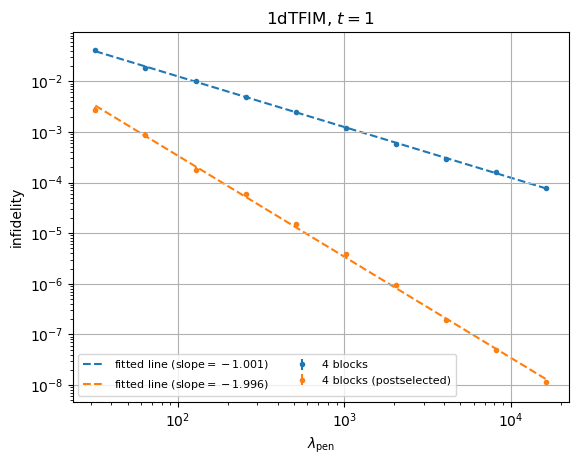

1dXZ, 4 blocks, postselected infidelity:
    lamb  count      mean       std
0     32     20  0.139973  0.004980
1     64     20  0.063764  0.002090
2    128     20  0.031197  0.001270
3    256     20  0.017089  0.000695
4    512     20  0.008450  0.000349
5   1024     20  0.004145  0.000170
6   2048     20  0.001964  0.000070
7   4096     20  0.000906  0.000036
8   8192     20  0.000534  0.000016
9  16384     20  0.000252  0.000008


1dXZ, 4 blocks, postselected infidelity:
    lamb  count          mean           std
0     32     20  2.579094e-02  2.269371e-03
1     64     20  7.169129e-03  6.351123e-04
2    128     20  1.790660e-03  1.669640e-04
3    256     20  4.888660e-04  4.385392e-05
4    512     20  1.237404e-04  1.119671e-05
5   1024     20  3.119082e-05  2.848453e-06
6   2048     20  7.817795e-06  7.173082e-07
7   4096     20  1.855909e-06  1.729052e-07
8   8192     20  4.707476e-07  4.220970e-08
9  16384     20  1.168099e-07  1.116044e-08




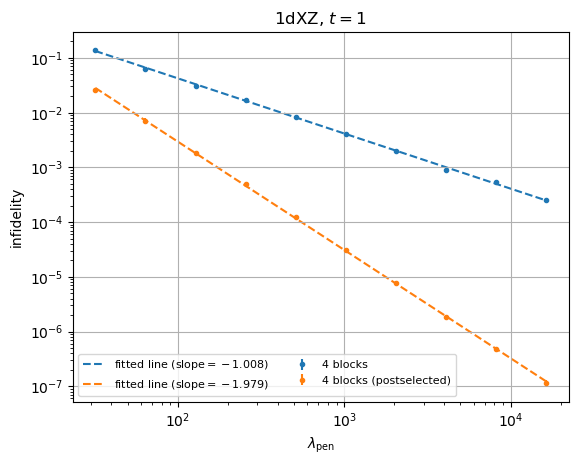

In [3]:
draw(["1dTFIM", "1dXZ"],[4])